# Importing Libraies

    Project 2: Logistic Regression - Predicting Admission to a University
    Problem Statement:
    The goal of this project is to build a logistic regression model to predict whether a student
    will be admitted to a university based on their academic profile, including their GRE
    score, TOEFL score, undergraduate CGPA, and other relevant factors. This model will
    help universities identify potential candidates for admission.
    Objective:
    i. Data Exploration and Cleaning
    ii. Data Splitting
    iii. Build and Train the Logistic Regression Model
    iv. Evaluate the Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as px
sns.set_style="darkgrid"

In [2]:
data=pd.read_csv("Admission_Predict_Ver1.1 (1).csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# EDA 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
#checking for null values
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

there are no nul values 

In [5]:
#data cleaning
#removing irrelevant columns
data=data.drop(columns=["Serial No."])

               

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


<Axes: >

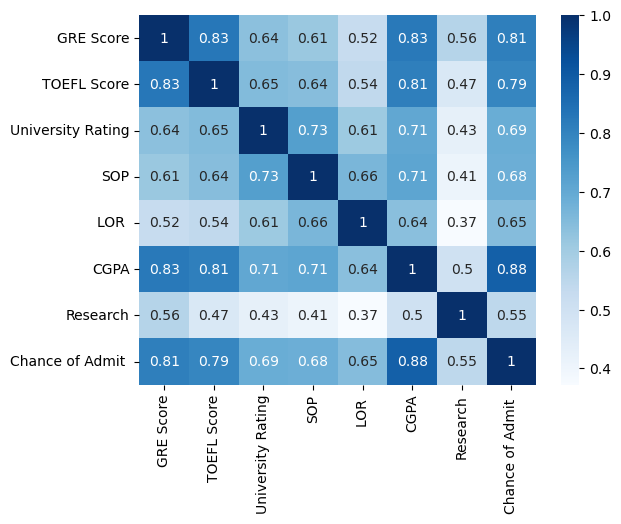

In [7]:
sns.heatmap(data.corr(), annot=True, cmap='Blues')


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


# Data Visualization

In [9]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
#selecting data 
data.columns = data.columns.str.strip()
df = data[["GRE Score","TOEFL Score","CGPA","Chance of Admit"]]
df.head()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
0,337,118,9.65,0.92
1,324,107,8.87,0.76
2,316,104,8.00,0.72
3,322,110,8.67,0.80
4,314,103,8.21,0.65


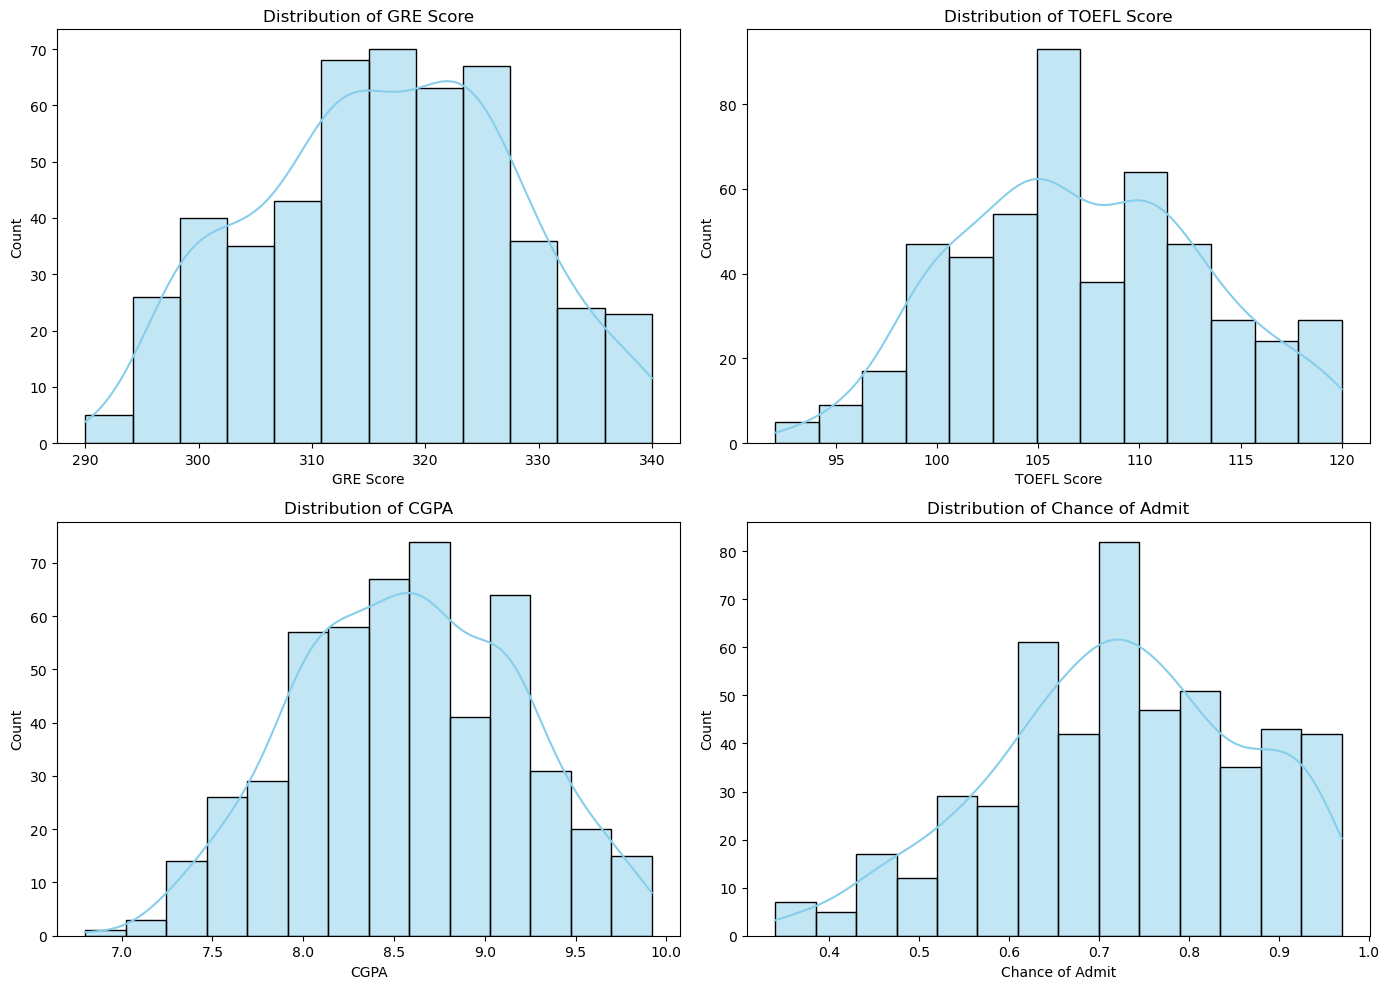

In [11]:

sns.set_style="darkgrid"
# Plot distributions for each column
plt.figure(figsize=(14, 10))

# Columns to plot
columns = ["GRE Score", "TOEFL Score", "CGPA", "Chance of Admit"]

for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GRE Score        500 non-null    int64  
 1   TOEFL Score      500 non-null    int64  
 2   CGPA             500 non-null    float64
 3   Chance of Admit  500 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


### Data Splitting

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df[["GRE Score","TOEFL Score","CGPA"]]
y=df[["Chance of Admit"]]

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=70)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 3)
(430, 3)
(70, 1)
(430, 1)


### Building and Training Model

In [17]:
#importing Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
X_test_scaled

array([[ 0.30893064,  0.46547052,  1.03306706],
       [ 1.28050107,  2.09936704,  0.63794245],
       [-0.30934145, -0.84164669,  0.17696375],
       ...,
       [-1.45756105, -0.35147774, -1.27182646],
       [ 0.57390439,  0.13869122,  0.04525555],
       [-0.5743152 , -0.18808809,  0.76965065]])

In [20]:
#Building Model
model=LogisticRegression()
model

LogisticRegression()

In [21]:
y_train

,Chance of Admit
194,0.77
453,0.73
119,0.71
126,0.85
454,0.71
...,...
176,0.90
129,0.92
212,0.95
71,0.96


In [22]:
threshold=0.7
#binarizing target variable, y _train and y_test
y_train_binary=(y_train>=threshold).astype(int)
y_test_binary=(y_test>=threshold).astype(int)

In [23]:
#Training model
# Convert y_train_binary to a NumPy array and ravel
model.fit(X_train_scaled, y_train_binary.values.ravel())#making it to 1D

LogisticRegression()

In [24]:
model.coef_,model.intercept_

(array([[0.71111494, 0.84056903, 1.08822883]]), array([0.92127462]))

### Model Evaluation

In [25]:
model.score(X_test_scaled,y_test_binary)

0.8534883720930233

Model is approximately 85.58% accurate

In [28]:
# converting to binfile
with open("Admission Homework Homework.ipynb", "rb") as file:
    data = file.read()

with open("Admission Homework Homework.bin", "wb") as binary_file:
    binary_file.write(data)

In [29]:
print("Conversion completed. File saved as your_notebook.bin")

Conversion completed. File saved as your_notebook.bin
